<a href="https://colab.research.google.com/github/AmanullaChishty/Pytorch/blob/main/ComputerVisionPytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn


## loading Data

In [2]:
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt


In [3]:
train_data = datasets.MNIST(root="data",train=True,download=True,transform=ToTensor(),target_transform = None)
test_data = datasets.MNIST(root="data",train=False,download=True,transform=ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 46237516.36it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 7276728.17it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 12898932.03it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 8856591.71it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
image,label = train_data[0]
# image,label
image.shape

torch.Size([1, 28, 28])

In [5]:
# Checking for sample size of test and train data
len(train_data.data),len(train_data.targets),len(test_data.data),len(test_data.targets)

(60000, 60000, 10000, 10000)

In [6]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## Visualizing the Data

Image Shape : torch.Size([1, 28, 28])


Text(0.5, 1.0, '5')

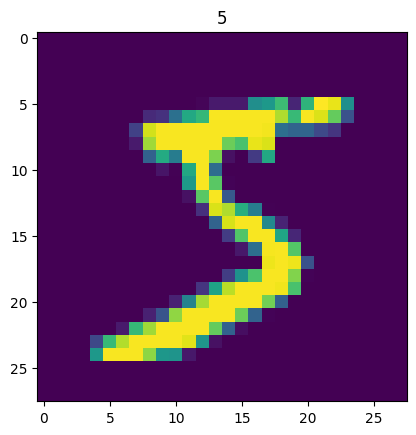

In [7]:
image,label = train_data[0]
print(f"Image Shape : {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

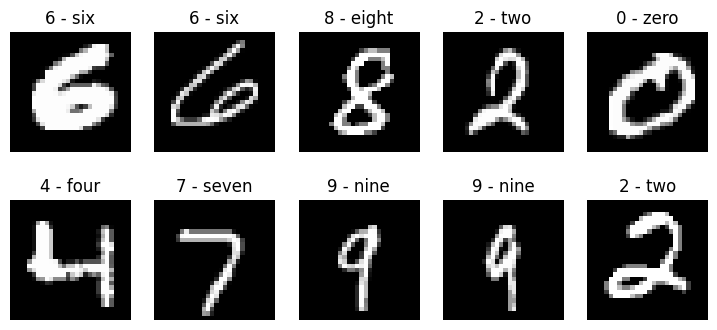

In [8]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,4))
rw,cl = 2,5
for i in range(1,rw*cl+1):
  random_idx = torch.randint(0,len(train_data),size=[1]).item()
  img,label = train_data[random_idx]
  fig.add_subplot(rw,cl,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

## Prepping Dataloader

In [9]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(train_data,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader = DataLoader(test_data,batch_size=BATCH_SIZE,shuffle=False)

print(f"Dataloaders : {train_dataloader,test_dataloader}")
print(f"Length of train dataloader : {len(train_dataloader)} and Length of test dataloader : {len(test_dataloader)}")
print(f"Number of batches in train dataloader : {BATCH_SIZE} and Number of batches in test dataloader : {BATCH_SIZE}")

Dataloaders : (<torch.utils.data.dataloader.DataLoader object at 0x7f5dd92924a0>, <torch.utils.data.dataloader.DataLoader object at 0x7f5dd92925c0>)
Length of train dataloader : 1875 and Length of test dataloader : 313
Number of batches in train dataloader : 32 and Number of batches in test dataloader : 32


## Building a CONVOLUTIONAL NUERAL NETWROK (CNN)

In [10]:
class MNISTModel(nn.Module):
  def __init__(self,input_shape:int,output_shape:int,hidden_units:int):
    super().__init__()
    self.block_1 = nn.Sequential(nn.Conv2d(in_channels=input_shape,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
    nn.ReLU(),
    nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2,stride=2))

    self.block_2 = nn.Sequential(nn.Conv2d(hidden_units,hidden_units,3,padding=1),
    nn.ReLU(),
    nn.Conv2d(hidden_units,hidden_units,3,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2))

    self.classifier = nn.Sequential(nn.Flatten(),nn.Linear(in_features=hidden_units*7*7,out_features=output_shape))

  def forward(self,x:torch.Tensor):
    x = self.block_1(x)
    x = self.block_2(x)
    x = self.classifier(x)
    return x

torch.manual_seed(42)

model_0 = MNISTModel(input_shape=1,output_shape=len(class_names),hidden_units=10)
model_0



MNISTModel(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [11]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [12]:
# Setting up loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)

## Training and testing Model

In [13]:
def train_step(model:torch.nn.Module,data_loader:torch.utils.data.DataLoader,loss_fn:torch.nn.Module,optimizer:torch.optim.Optimizer,accuracy_fn):
  train_loss,train_acc = 0,0
  for batch, (X,y) in enumerate(data_loader):
    y_pred = model(X)
    loss = loss_fn(y_pred,y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss : {train_loss:.5f} and Train accuracy : {train_acc:.2f}%")



In [14]:
def test_step(model:torch.nn.Module,data_loader:torch.utils.data.DataLoader,loss_fn:torch.nn.Module,accuracy_fn):
  test_loss,test_acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      test_pred = model(X)
      test_loss += loss_fn(test_pred,y)
      test_acc += accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss : {test_loss:.5f} and Test accuracy : {test_acc:.2f}%")

In [15]:
def eval_model(model:torch.nn.Module,data_loader:torch.utils.data.DataLoader,loss_fn:torch.nn.Module,accuracy_fn):
  loss,acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      test_pred = model(X)
      loss += loss_fn(test_pred,y)
      acc += accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}

In [16]:
import tqdm
torch.manual_seed(42)

epochs = 3

for epoch in tqdm.tqdm(range(epochs)):
  print(f"Epoch : {epoch}\n--------------")
  train_step(model=model_0,data_loader=train_dataloader,loss_fn=loss_fn,optimizer=optimizer,accuracy_fn=accuracy_fn)
  test_step(model=model_0,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
--------------
Train loss : 0.33561 and Train accuracy : 88.74%


 33%|███▎      | 1/3 [01:10<02:20, 70.35s/it]

Test loss : 0.07362 and Test accuracy : 97.71%
Epoch : 1
--------------
Train loss : 0.08217 and Train accuracy : 97.44%


 67%|██████▋   | 2/3 [02:07<01:02, 62.54s/it]

Test loss : 0.06596 and Test accuracy : 97.95%
Epoch : 2
--------------
Train loss : 0.06436 and Train accuracy : 97.97%


100%|██████████| 3/3 [03:02<00:00, 60.99s/it]

Test loss : 0.05947 and Test accuracy : 98.04%


In [17]:
model_results = eval_model(model=model_0,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)
model_results

{'model_name': 'MNISTModel',
 'model_loss': 0.05947470664978027,
 'model_acc': 98.04313099041534}

## Using the model to make predictions

In [18]:
def make_predictions(model:torch.nn.Module,data:list):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0)
      pred_logit = model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)
      pred_probs.append(pred_prob)
  return torch.stack(pred_probs)

In [19]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample,label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)
print(f"Test samples : {test_samples[0].shape}")
print(f"Test labels : {test_labels[0]}")
print(f"Test sample label : {class_names[test_labels[0]]}")

Test samples : torch.Size([1, 28, 28])
Test labels : 2
Test sample label : 2 - two


In [20]:
pred_probs = make_predictions(model=model_0,data=test_samples)
pred_probs[:2]

tensor([[9.5611e-11, 5.2553e-07, 1.0000e+00, 1.3429e-07, 2.3216e-14, 1.6182e-15,
         1.1093e-13, 6.9319e-09, 1.7391e-06, 1.2477e-10],
        [1.3504e-07, 9.9834e-01, 1.5989e-06, 5.4371e-08, 6.9274e-06, 7.8727e-04,
         2.2412e-04, 2.4924e-07, 6.1812e-04, 1.8624e-05]])

In [21]:
pred_classes = torch.argmax(pred_probs,dim=1)
pred_classes

tensor([2, 1, 2, 4, 6, 6, 4, 9, 1])

In [22]:
test_labels,pred_classes

([2, 1, 2, 4, 6, 6, 4, 9, 1], tensor([2, 1, 2, 4, 6, 6, 4, 9, 1]))

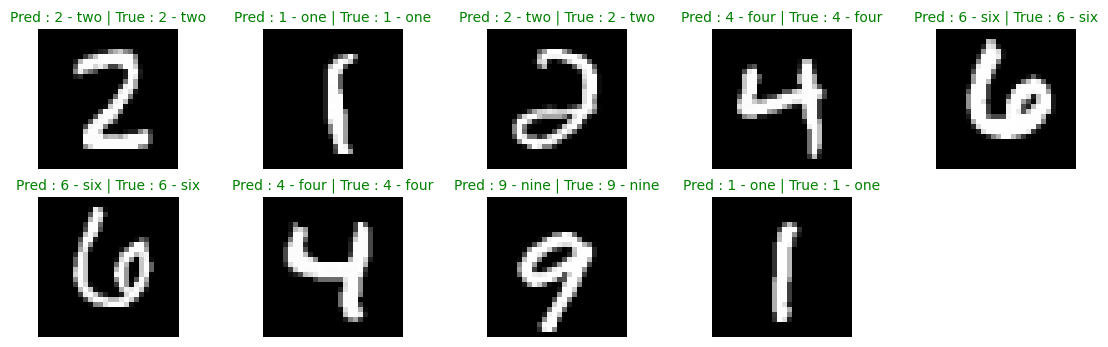

In [23]:
plt.figure(figsize=(14,4))
rws = 2
cls = 5
for i,sample in enumerate(test_samples):
  plt.subplot(rws,cls,i+1)
  plt.imshow(sample.squeeze(),cmap="gray")
  pred_label = class_names[pred_classes[i]]
  true_label = class_names[test_labels[i]]
  title_text = f"Pred : {pred_label} | True : {true_label}"
  if pred_label == true_label:
    plt.title(title_text,fontsize=10,c="green")
  else:
    plt.title(title_text,fontsize=10,c="red")
  plt.axis(False)

## Plotting a confusion matric to evaluate the model predictions

In [24]:
from tqdm.auto import tqdm

y_preds = []
model_0.eval
with torch.inference_mode():
  for X,y in tqdm(test_dataloader,desc = "Making Predictions"):
    y_logits = model_0(X)
    y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)
    y_preds.append(y_pred)
y_pred_tensor = torch.cat(y_preds)

Making Predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [25]:
import mlxtend
mlxtend.__version__

'0.23.1'

In [26]:
!pip install torchmetrics==0.9.3

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

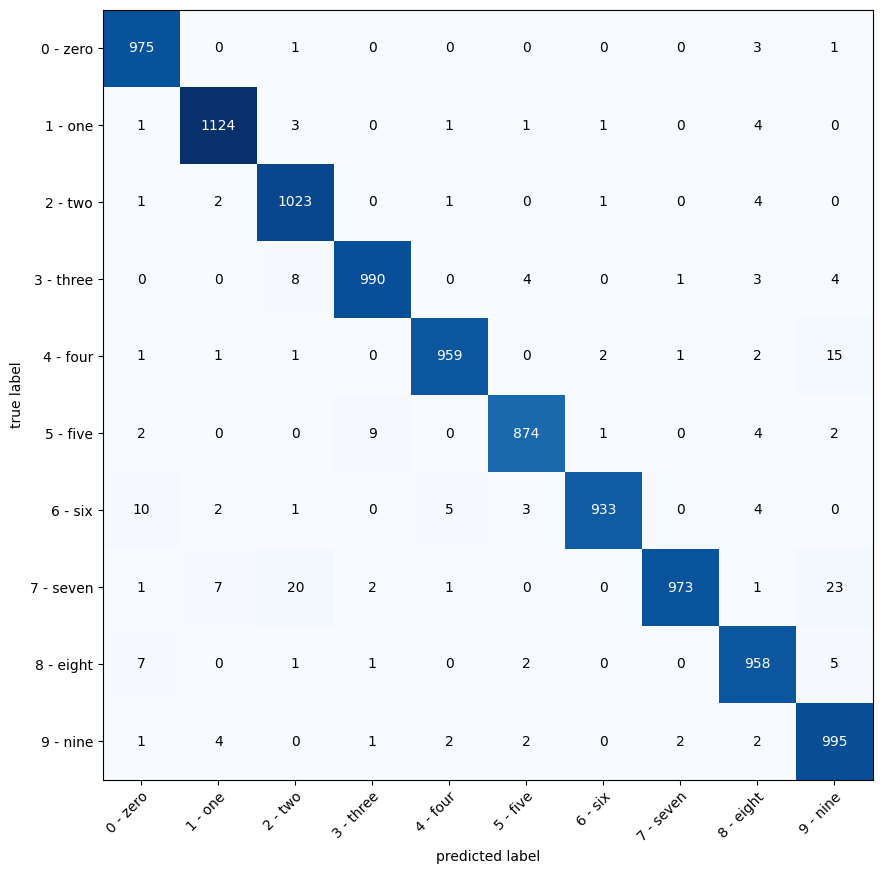

In [27]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

cofmat = ConfusionMatrix(num_classes=len(class_names),task="multiclass")
cofmat_tensor = cofmat(y_pred_tensor,test_data.targets)

fx,ax = plot_confusion_matrix(conf_mat=cofmat_tensor.numpy(),figsize=(10,10),class_names=class_names)

## Saving and loading the Model

In [28]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME = "mnist_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)


Saving model to : models/mnist_model.pth


In [29]:
loaded_model_0 = MNISTModel(input_shape=1,output_shape=len(class_names),hidden_units=10)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [30]:
torch.manual_seed(42)

loaded_model_0_results = eval_model(model=loaded_model_0,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)
loaded_model_0_results

{'model_name': 'MNISTModel',
 'model_loss': 0.05947470664978027,
 'model_acc': 98.04313099041534}

In [31]:
# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(loaded_model_0_results["model_loss"]),torch.tensor(model_results["model_loss"]),atol=1e-08,rtol=1e-05)

tensor(True)

## Understanding hyperparameters


In [32]:
# creating a random tensor
torch.manual_seed(42)

images = torch.randn(size=(1,3,64,64))
test_image = images[0]
images.shape,test_image.shape

(torch.Size([1, 3, 64, 64]), torch.Size([3, 64, 64]))

In [33]:
test_image

tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978,  1.0261,  1.1465,  ...,  1.2134,  0.9354, -0.0780],
         [-1.4647, -1.9571,  0.1017,  ..., -1

In [34]:
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels=3,out_channels=10,kernel_size=3,stride=1,padding=1)
conv_layer.weight.shape

torch.Size([10, 3, 3, 3])

In [35]:
conv_layer(test_image)

tensor([[[ 1.3047,  1.4238,  0.9435,  ...,  0.3078,  0.4244, -0.3909],
         [ 0.6132,  1.5396,  0.0516,  ...,  0.8711,  0.4256, -0.3416],
         [ 1.0524,  0.3662,  1.0114,  ...,  0.2809, -0.2741,  0.3787],
         ...,
         [ 0.0377,  0.2981, -0.2432,  ..., -0.7283, -0.5767, -0.0783],
         [-0.2693, -0.0386, -0.0781,  ...,  0.4228, -0.1802, -0.5140],
         [ 0.5006, -0.5684,  0.1166,  ...,  0.5425, -0.3335,  0.7756]],

        [[-0.1153,  0.5129, -0.7227,  ..., -0.6758,  0.4840, -0.8125],
         [ 0.2266, -0.2840, -0.0319,  ...,  1.5599, -1.2449, -0.4410],
         [-0.6666,  0.2753, -0.1262,  ...,  0.1999, -0.8856, -0.4292],
         ...,
         [-0.0647, -0.1984, -0.6386,  ..., -0.0585, -0.7833, -0.0764],
         [ 0.2940, -0.6306, -0.2052,  ...,  0.2456, -0.7134,  0.7373],
         [-0.1683, -0.8397,  0.2643,  ...,  0.2593, -0.5630,  0.1587]],

        [[ 0.4864, -0.7476, -0.6414,  ...,  0.5477, -1.2156,  0.2989],
         [-0.5791,  0.4414,  0.5100,  ...,  0

In [36]:
torch.manual_seed(42)
conv_layer_v1 = nn.Conv2d(in_channels=3,out_channels=10,kernel_size=5,stride=1,padding=1)
conv_layer_v1.weight.shape

torch.Size([10, 3, 5, 5])

In [37]:
conv_layer_v1(test_image)

tensor([[[ 0.4772,  0.5412,  0.1020,  ...,  0.3054,  0.7428, -0.6291],
         [ 0.6307, -0.5948,  0.5159,  ...,  0.4623, -0.6036,  0.2882],
         [-0.1225,  0.3460, -0.1724,  ...,  0.5209,  1.3144,  0.5093],
         ...,
         [-0.4374, -0.8416,  0.1119,  ..., -0.6631,  0.4715,  0.1906],
         [ 0.4695,  1.0285,  1.5175,  ..., -0.7155, -0.8667, -0.1813],
         [-0.3646,  0.2086, -0.0867,  ..., -0.0119,  0.0038, -0.0834]],

        [[ 0.4346, -0.7569, -0.3307,  ..., -0.0755,  0.6692,  0.4795],
         [-0.0036,  0.1400, -1.2239,  ..., -0.7517,  1.1006, -0.6558],
         [ 1.6202, -0.4693,  0.4681,  ...,  1.1656, -0.2948,  0.7524],
         ...,
         [-1.0973, -0.6935, -0.6618,  ...,  0.7032, -0.2685,  0.4434],
         [ 0.2814,  0.3958,  0.9908,  ..., -1.2961, -0.6092, -0.1906],
         [ 0.4268, -0.4845,  0.3031,  ..., -0.3548, -0.0345, -0.4605]],

        [[-0.2106, -0.3158, -0.3174,  ..., -0.2237, -0.1806,  0.0684],
         [ 0.8027,  1.7556, -1.0250,  ..., -0

## Developing a CNN for FashionMNIST data

In [39]:
# importing libraries
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

In [38]:
train_data = datasets.FashionMNIST(root="data",train=True,download=True,transform=ToTensor(),target_transform = None)
test_data = datasets.FashionMNIST(root="data",train=False,download=True,transform=ToTensor())

100%|██████████| 26421880/26421880 [00:01<00:00, 19001013.47it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 312551.78it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5520881.89it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 15088942.69it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [42]:
image, label = train_data[0]
image.shape,label

(torch.Size([1, 28, 28]), 9)

In [43]:
len(train_data.data),len(train_data.targets),len(test_data.data),len(test_data.targets)

(60000, 60000, 10000, 10000)

In [44]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Text(0.5, 1.0, '9')

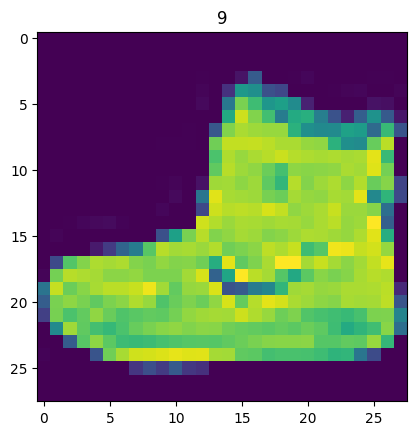

In [45]:
#Visualizing the data
plt.imshow(image.squeeze())
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

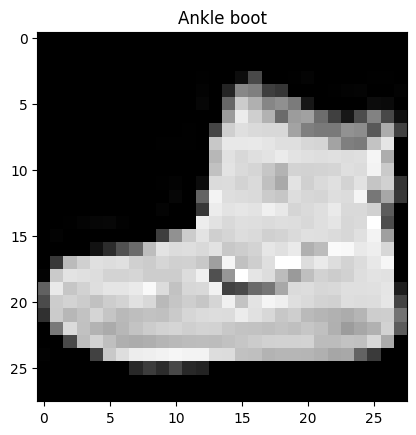

In [46]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label])

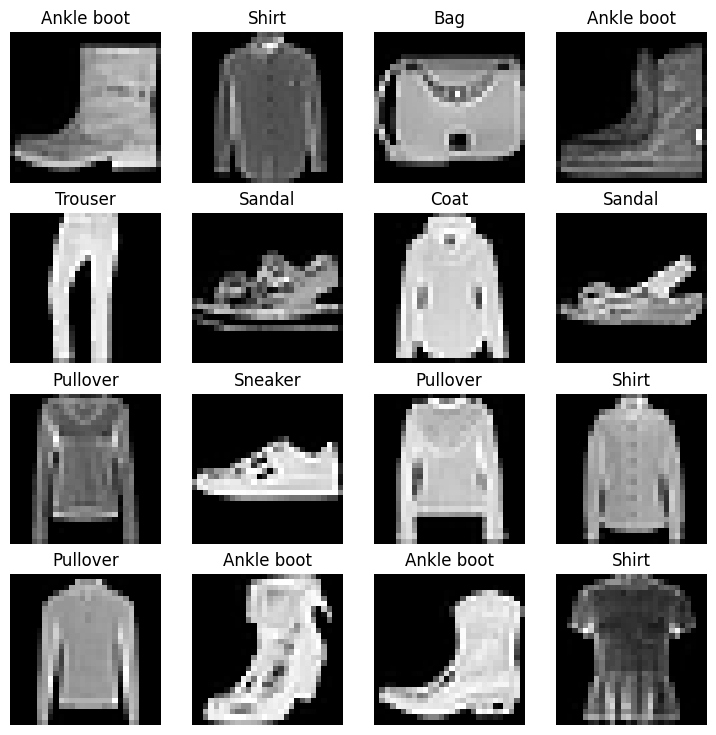

In [53]:
torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rw,cl = 4,4
for i in range(1,rw*cl+1):
  random_idx = torch.randint(0,len(train_data),size=[1]).item()
  img,label = train_data[random_idx]
  fig.add_subplot(rw,cl,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);

In [54]:
# prepping Dataloader
BATCH_SIZE = 32
train_dataloader = DataLoader(train_data,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader = DataLoader(test_data,batch_size=BATCH_SIZE,shuffle=False)
len(train_dataloader),len(test_dataloader)

(1875, 313)

In [59]:
# Model Building
class FashionMNISTModel(nn.Module):
  def __init__(self,input_shape:int,output_shape:int,hidden_units:int):
    super().__init__()
    self.bloack_1 = nn.Sequential(nn.Conv2d(in_channels=input_shape,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
    nn.ReLU(),
    nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2,stride=2))

    self.block_2 = nn.Sequential(nn.Conv2d(hidden_units,hidden_units,3,padding=1),
    nn.ReLU(),
    nn.Conv2d(hidden_units,hidden_units,3,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2))

    self.classifier = nn.Sequential(nn.Flatten(),nn.Linear(in_features=hidden_units*7*7,out_features=output_shape))

  def forward(self,x:torch.Tensor):
    x = self.bloack_1(x)
    x = self.block_2(x)
    x = self.classifier(x)
    return x

torch.manual_seed(42)
model_1 = FashionMNISTModel(input_shape=1,output_shape=len(class_names),hidden_units=15)
model_1

FashionMNISTModel(
  (bloack_1): Sequential(
    (0): Conv2d(1, 15, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(15, 15, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(15, 15, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(15, 15, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=735, out_features=10, bias=True)
  )
)

In [60]:
# setting up loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.1)

In [61]:
# training and testing Model
from tqdm.auto import tqdm
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch}\n--------------")
  train_step(model=model_1,data_loader=train_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn,optimizer=optimizer)
  test_step(model=model_1,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
--------------
Train loss : 0.59384 and Train accuracy : 78.19%
Test loss : 0.45113 and Test accuracy : 82.74%
Epoch : 1
--------------
Train loss : 0.34914 and Train accuracy : 87.41%
Test loss : 0.33522 and Test accuracy : 87.98%
Epoch : 2
--------------
Train loss : 0.30688 and Train accuracy : 89.00%
Test loss : 0.30152 and Test accuracy : 88.82%


In [62]:
model_1_results = eval_model(model=model_1,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)
model_1_results

{'model_name': 'FashionMNISTModel',
 'model_loss': 0.30152180790901184,
 'model_acc': 88.81789137380191}

In [64]:
# Make predictions

def make_predictions(model:torch.nn.Module,data:list):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample,dim=0)
      pred_logit = model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)
      pred_probs.append(pred_prob)
  return torch.stack(pred_probs)


In [65]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample,label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

In [66]:
pred_probs = make_predictions(model=model_1,data=test_samples)
pred_probs[:2]

tensor([[2.6307e-07, 2.3178e-08, 1.3135e-07, 2.5284e-08, 2.7184e-07, 9.9768e-01,
         1.0302e-06, 8.4187e-06, 1.9528e-04, 2.1118e-03],
        [2.2121e-04, 9.9363e-01, 1.7593e-05, 5.1699e-03, 7.1211e-04, 1.9200e-05,
         2.1863e-04, 1.2433e-06, 6.9731e-06, 8.1882e-07]])

In [67]:
pred_classes = torch.argmax(pred_probs,dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [68]:
test_labels,pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 1, 7, 4, 3, 0, 4, 7, 1]))

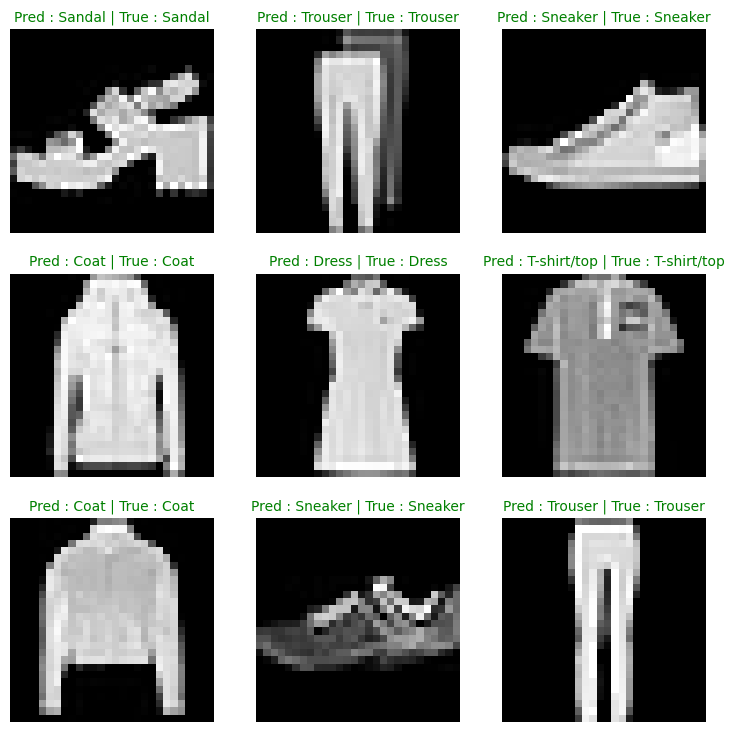

In [69]:
#plotting predictions
plt.figure(figsize=(9,9))
rw,cl = 3,3
for i,sample in enumerate(test_samples):
  plt.subplot(rw,cl,i+1)
  plt.imshow(sample.squeeze(),cmap="gray")
  pred_label = class_names[pred_classes[i]]
  true_label = class_names[test_labels[i]]
  title_text = f"Pred : {pred_label} | True : {true_label}"
  if pred_label == true_label:
    plt.title(title_text,fontsize=10,c="green")
  else:
    plt.title(title_text,fontsize=10,c="red")
  plt.axis(False)
